In [1]:
import numpy as np
import pandas as pd

In [2]:

num_transactions = 50_000
num_customers = 5_000
num_products = 200

# Generowanie listy klientów
customers = pd.DataFrame({
    'customer_id': range(1, num_customers + 1),
    'age': np.random.randint(18, 70, num_customers),
    'gender': np.random.choice(['Male', 'Female'], num_customers, p=[0.45, 0.55]),
    'city': np.random.choice(['Warszawa', 'Kraków', 'Wrocław', 'Poznań', 'Gdańsk'], num_customers, p=[0.3, 0.2, 0.2, 0.15, 0.15])
})

# Generowanie listy produktów
categories = ['Napoje', 'Przekąski', 'Alkohol', 'Produkty świeże', 'Nabiał', 'Pieczywo', 'Słodycze', 'Mrożonki']
products = pd.DataFrame({
    'product_id': range(1, num_products + 1),
    'category': np.random.choice(categories, num_products),
    'product_name': [f'Produkt_{i}' for i in range(1, num_products + 1)],
    'price': np.round(np.random.uniform(1.5, 30, num_products), 2)
})

# Generowanie transakcji
transactions = pd.DataFrame({
    'transaction_id': range(1, num_transactions + 1),
    'customer_id': np.random.choice(customers['customer_id'], num_transactions),
    'product_id': np.random.choice(products['product_id'], num_transactions),
    'quantity': np.random.randint(1, 5, num_transactions),
    'purchase_date': pd.to_datetime(np.random.choice(pd.date_range('2024-01-01', '2024-12-31'), num_transactions))
})


merged_df = transactions.merge(customers, on='customer_id').merge(products, on='product_id')

merged_df.head()


,transaction_id,customer_id,product_id,quantity,purchase_date,age,gender,city,category,product_name,price
0,1,837,200,2,2024-01-05,47,Female,Gdańsk,Alkohol,Produkt_200,5.43
1,2,2619,64,3,2024-01-17,55,Male,Gdańsk,Produkty świeże,Produkt_64,21.71
2,3,924,100,4,2024-05-23,32,Male,Kraków,Słodycze,Produkt_100,21.51
3,4,2653,174,3,2024-12-03,67,Female,Kraków,Mrożonki,Produkt_174,12.95
4,5,241,149,4,2024-01-30,39,Female,Poznań,Mrożonki,Produkt_149,10.01


In [3]:
merged_df.shape

(50000, 11)

In [4]:
merged_df.columns

Index(['transaction_id', 'customer_id', 'product_id', 'quantity',
       'purchase_date', 'age', 'gender', 'city', 'category', 'product_name',
       'price'],
      dtype='object')

In [5]:
merged_df.describe()

,transaction_id,customer_id,product_id,quantity,purchase_date,age,price
count,50000.000000,50000.000000,50000.00000,50000.000000,50000,50000.000000,50000.000000
mean,25000.500000,2506.856860,100.43846,2.495040,2024-06-30 23:01:45.984000,43.700400,15.331456
min,1.000000,1.000000,1.00000,1.000000,2024-01-01 00:00:00,18.000000,1.720000
25%,12500.750000,1271.000000,50.00000,1.000000,2024-04-01 00:00:00,30.000000,8.300000
50%,25000.500000,2504.500000,100.00000,2.000000,2024-06-30 00:00:00,43.000000,15.780000
75%,37500.250000,3760.000000,151.00000,3.000000,2024-09-30 00:00:00,57.000000,22.220000
max,50000.000000,5000.000000,200.00000,4.000000,2024-12-31 00:00:00,69.000000,29.980000
std,14433.901067,1443.112342,57.79854,1.118553,NaN,15.211335,8.163093


In [6]:
#Analiza sprzedaży produktów

#Które produkty były najczęściej kupowane w 2024 roku?
products_bought_2024 = merged_df.groupby("product_id")["quantity"].sum()
products_bought_2024.sort_values(ascending=False).idxmax()
print(merged_df[merged_df["product_id"] == 26])
#Jakie kategorie produktów sprzedają się najlepiej?
#Jaka jest średnia cena produktów w każdej kategorii?

       transaction_id  customer_id  product_id  quantity purchase_date  age  \
82                 83          529          26         1    2024-07-02   46   
464               465         4219          26         2    2024-12-19   43   
633               634           35          26         2    2024-08-28   63   
647               648         1191          26         2    2024-08-26   26   
665               666         2939          26         2    2024-08-07   51   
...               ...          ...         ...       ...           ...  ...   
48905           48906         1912          26         1    2024-01-14   46   
48934           48935         3307          26         2    2024-12-30   19   
49124           49125         1682          26         1    2024-12-13   48   
49738           49739         3009          26         3    2024-10-22   67   
49755           49756         2009          26         3    2024-06-13   35   

       gender      city         category product_na

In [7]:
#Jakie kategorie produktów sprzedają się najlepiej?
top_products = merged_df.groupby("category")["quantity"].count().sort_values(ascending=False)
print(top_products)


category
Napoje             7425
Alkohol            6999
Produkty świeże    6554
Przekąski          6463
Słodycze           6249
Pieczywo           6030
Mrożonki           5494
Nabiał             4786
Name: quantity, dtype: int64


In [8]:
#Jaka jest średnia cena produktów w każdej kategorii?
mean_price_by_category = round(merged_df.groupby("category")["price"].mean().sort_values(ascending=False),2)
print(mean_price_by_category)

category
Produkty świeże    18.08
Słodycze           17.35
Nabiał             17.02
Alkohol            15.94
Przekąski          15.11
Mrożonki           13.83
Pieczywo           13.08
Napoje             12.68
Name: price, dtype: float64


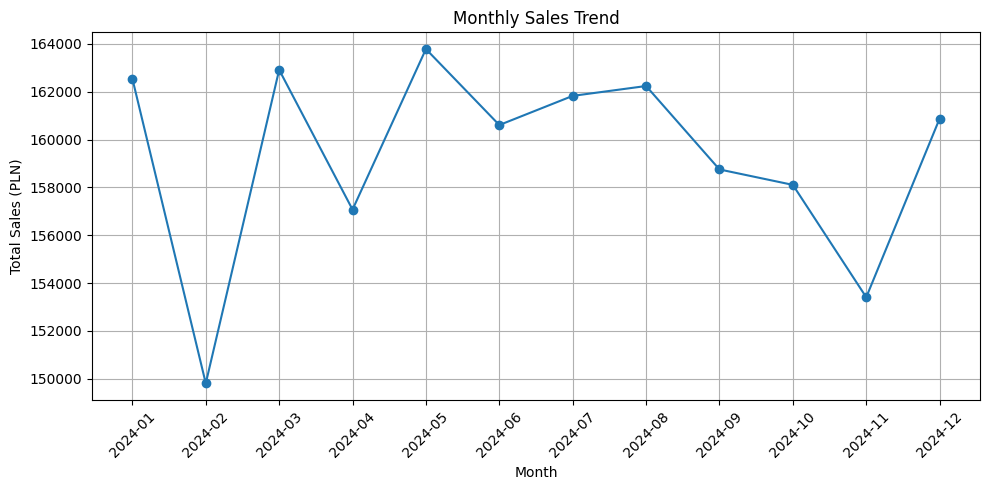

In [10]:
merged_df['total_value'] = merged_df['price'] * merged_df['quantity']
merged_df['month'] = merged_df['purchase_date'].dt.to_period('M')

monthly_sales = (
    merged_df.groupby('month')['total_value']
    .sum()
    .reset_index()
)


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(monthly_sales['month'].astype(str), monthly_sales['total_value'], marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (PLN)')
plt.grid(True)
plt.tight_layout()
plt.show()


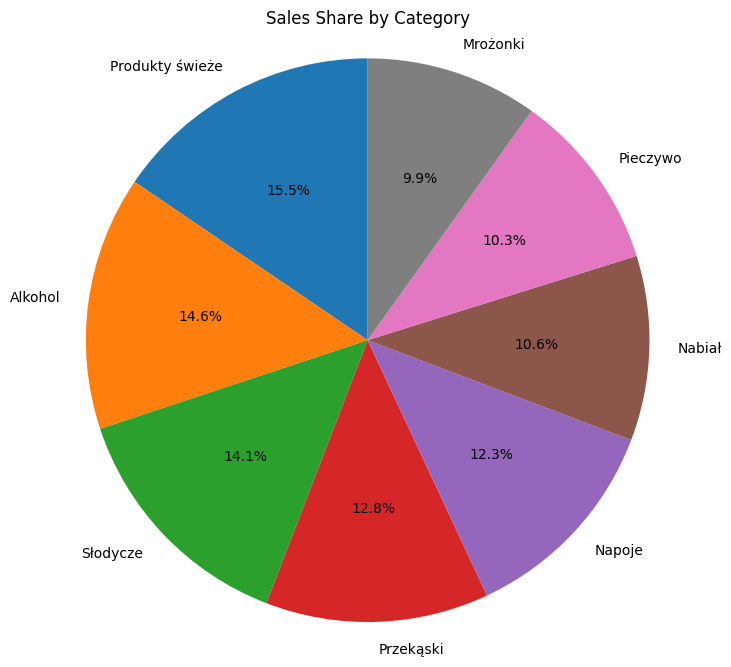

In [11]:
category_sales = (
    merged_df.groupby('category')['total_value']
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8, 8))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales Share by Category')
plt.axis('equal')
plt.show()


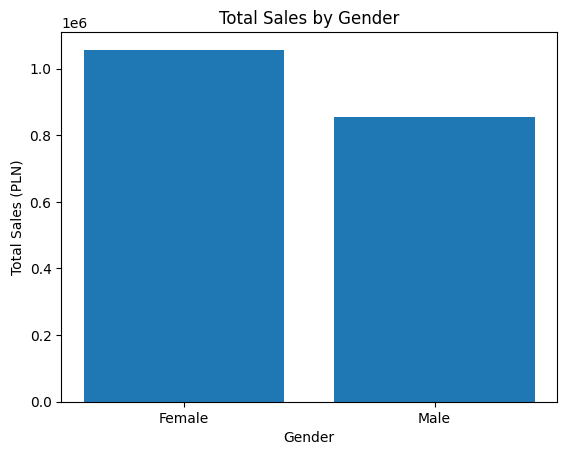

In [12]:
gender_sales = (
    merged_df.groupby('gender')['total_value']
    .sum()
    .reset_index()
)

plt.bar(gender_sales['gender'], gender_sales['total_value'])
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales (PLN)')
plt.show()
